In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **IMPORT NECCESSARY PACKAGES**

In [1]:
!pip install ultralytics
!pip install roboflow
from ultralytics import YOLO 
from IPython.display import Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.235 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5310.7/8062.4 GB disk)


# **LOAD THE TRAINING DATASET**

In [2]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="tAFRYqzjQXahvMhjPcZv")
project = rf.workspace("sixray-dpgc6").project("weapon_detection-cuahn")
dataset = project.version(7).download("yolov8")

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.235, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to weapon_detection-7 in yolov8:: 100%|██████████| 7460/7460 [00:01<00:00, 6210.39it/s]


# **LOAD THE MODEL**

In [3]:
yolo8_model_detection =YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 74.7MB/s]


# **COPY DATASET IN A NEW DIRECTORY**

In [6]:
import os 
os.makedirs('datasets',exist_ok = True)
!cp -r /kaggle/working/weapon_detection-7 datasets/sixray100-1

# **TRAIN MODEL**

In [7]:
yolo8_model_detection.train(data='/kaggle/working/datasets/sixray100-1/data.yaml', epochs=100, imgsz=640, batch=64,project='YOLO_weights',name='SIXray_Output',exist_ok=True)

Ultralytics YOLOv8.0.235 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/datasets/sixray100-1/data.yaml, epochs=100, time=None, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=YOLO_weights, name=SIXray_Output, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

100%|██████████| 755k/755k [00:00<00:00, 14.5MB/s]
2024-01-06 18:28:59,844	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-06 18:29:00,856	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/working/datasets/sixray100-1/weapon_detection-7/train/labels... 2841 images, 4 backgrounds, 0 corrupt: 100%|██████████| 2841/2841 [00:02<00:00, 1188.22it/s]


train: New cache created: /kaggle/working/datasets/sixray100-1/weapon_detection-7/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 14, len(boxes) = 7064. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/sixray100-1/weapon_detection-7/valid/labels... 587 images, 0 backgrounds, 0 corrupt: 100%|██████████| 587/587 [00:00<00:00, 1153.93it/s]

val: New cache created: /kaggle/working/datasets/sixray100-1/weapon_detection-7/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 1503. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to YOLO_weights/SIXray_Output/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.15G      1.415      3.018      1.427         97        640: 100%|██████████| 45/45 [00:39<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.18s/it]

                   all        587       1503      0.665      0.139      0.219      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.18G      1.241      1.878      1.309        113        640: 100%|██████████| 45/45 [00:36<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all        587       1503      0.656      0.252      0.262      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.13G      1.227       1.65      1.306        107        640: 100%|██████████| 45/45 [00:36<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        587       1503      0.537       0.26      0.185     0.0977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.12G      1.249      1.562       1.34         96        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        587       1503      0.625      0.246      0.255      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.06G      1.208      1.397      1.309        116        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]

                   all        587       1503      0.696      0.386      0.376      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.13G      1.163      1.266      1.279        115        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        587       1503      0.784      0.364      0.417      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.13G      1.138      1.206      1.267        119        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        587       1503      0.582       0.39      0.422      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.15G      1.117      1.163       1.26        137        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        587       1503      0.834      0.423      0.497      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.04G      1.088      1.111      1.241        118        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        587       1503      0.673      0.455      0.557      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.16G      1.079      1.059       1.23        145        640: 100%|██████████| 45/45 [00:36<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        587       1503      0.717      0.508      0.549      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.04G      1.072      1.042      1.231        105        640: 100%|██████████| 45/45 [00:36<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all        587       1503      0.871       0.47      0.596      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.14G      1.052     0.9938       1.22        150        640: 100%|██████████| 45/45 [00:36<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all        587       1503       0.66      0.488      0.514      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.16G      1.055     0.9903      1.212        140        640: 100%|██████████| 45/45 [00:37<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        587       1503      0.824       0.55      0.616      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.17G       1.04     0.9518      1.204        132        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

                   all        587       1503      0.693      0.553      0.565      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.15G      1.023      0.948        1.2        100        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        587       1503      0.805      0.528        0.6      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.12G       1.01      0.916      1.196        112        640: 100%|██████████| 45/45 [00:36<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all        587       1503      0.789      0.512      0.584      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.17G     0.9953     0.9098      1.182         98        640: 100%|██████████| 45/45 [00:37<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all        587       1503      0.794      0.567      0.617      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.17G      1.001     0.9084      1.189        153        640: 100%|██████████| 45/45 [00:36<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        587       1503       0.84      0.578      0.646      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.17G     0.9872     0.8828      1.178        113        640: 100%|██████████| 45/45 [00:35<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        587       1503      0.832      0.575       0.63      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.17G     0.9775     0.8674      1.172         94        640: 100%|██████████| 45/45 [00:36<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        587       1503      0.819      0.543      0.603      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.15G     0.9688     0.8526      1.164        138        640: 100%|██████████| 45/45 [00:35<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        587       1503      0.789      0.626      0.658      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.14G     0.9695     0.8438      1.169        104        640: 100%|██████████| 45/45 [00:36<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        587       1503      0.779      0.621      0.676      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.15G     0.9576     0.8323      1.161        118        640: 100%|██████████| 45/45 [00:37<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]

                   all        587       1503      0.761       0.59      0.629      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.04G     0.9541      0.812      1.155        123        640: 100%|██████████| 45/45 [00:36<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

                   all        587       1503      0.883      0.584      0.718      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.15G     0.9526      0.804      1.153        106        640: 100%|██████████| 45/45 [00:36<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        587       1503      0.736      0.712      0.747      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.17G     0.9348     0.7875      1.147        123        640: 100%|██████████| 45/45 [00:35<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        587       1503       0.77      0.617      0.658      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.13G     0.9331     0.7823      1.142        123        640: 100%|██████████| 45/45 [00:37<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

                   all        587       1503      0.902      0.535      0.672      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.15G     0.9233     0.7753      1.137         85        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all        587       1503       0.86      0.647      0.698      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.14G     0.9298     0.7805      1.146        119        640: 100%|██████████| 45/45 [00:35<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        587       1503      0.822      0.657      0.691      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.17G     0.9127     0.7606      1.128        138        640: 100%|██████████| 45/45 [00:36<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        587       1503      0.836      0.593      0.689      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.17G     0.9006     0.7435      1.124        100        640: 100%|██████████| 45/45 [00:36<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

                   all        587       1503      0.782      0.721      0.762      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.15G     0.9038     0.7466      1.127        125        640: 100%|██████████| 45/45 [00:37<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]

                   all        587       1503      0.856      0.661       0.88      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.14G     0.9009      0.749      1.124        117        640: 100%|██████████| 45/45 [00:37<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        587       1503      0.869      0.645      0.689      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.17G     0.8931     0.7446      1.127        151        640: 100%|██████████| 45/45 [00:35<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        587       1503      0.848      0.745      0.802      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.14G     0.8971     0.7342      1.116        138        640: 100%|██████████| 45/45 [00:35<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all        587       1503      0.796      0.775      0.805      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.14G     0.8803      0.715      1.108        131        640: 100%|██████████| 45/45 [00:35<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        587       1503      0.908      0.641      0.743      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.14G     0.8846     0.7152      1.114        112        640: 100%|██████████| 45/45 [00:35<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        587       1503      0.854      0.748      0.803      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.15G     0.8762     0.7105      1.116         91        640: 100%|██████████| 45/45 [00:35<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all        587       1503      0.784      0.779      0.798      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.14G     0.8723     0.6917      1.102         96        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        587       1503      0.777      0.737      0.777      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.17G     0.8674     0.6959       1.11        125        640: 100%|██████████| 45/45 [00:35<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        587       1503      0.905      0.733      0.798       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.15G     0.8694     0.6787        1.1        131        640: 100%|██████████| 45/45 [00:36<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        587       1503      0.878      0.655      0.719      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.04G     0.8606     0.6867      1.097         96        640: 100%|██████████| 45/45 [00:36<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        587       1503      0.815      0.745      0.785      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.16G     0.8568     0.6728      1.095        127        640: 100%|██████████| 45/45 [00:35<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        587       1503        0.9      0.648      0.736      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.14G     0.8463     0.6636      1.093        106        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        587       1503      0.837       0.78      0.865      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.14G     0.8491     0.6752      1.096        107        640: 100%|██████████| 45/45 [00:36<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]

                   all        587       1503      0.823      0.782       0.81      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.15G     0.8428     0.6597      1.087        148        640: 100%|██████████| 45/45 [00:36<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all        587       1503      0.853      0.784      0.859      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.14G     0.8433     0.6604      1.091        117        640: 100%|██████████| 45/45 [00:36<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        587       1503      0.917      0.707      0.856      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.16G     0.8406     0.6623      1.097        131        640: 100%|██████████| 45/45 [00:37<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all        587       1503      0.754      0.651      0.739      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.15G     0.8421     0.6552      1.092         94        640: 100%|██████████| 45/45 [00:35<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        587       1503       0.84       0.73      0.791      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.13G     0.8393     0.6474      1.086        106        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        587       1503      0.816      0.789      0.806      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.14G     0.8204     0.6341      1.073        107        640: 100%|██████████| 45/45 [00:36<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        587       1503       0.88      0.671      0.724      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.04G     0.8182     0.6201       1.08        108        640: 100%|██████████| 45/45 [00:36<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        587       1503      0.896      0.739      0.815      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.14G     0.8145     0.6338      1.079        125        640: 100%|██████████| 45/45 [00:36<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

                   all        587       1503      0.838        0.7      0.813      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.16G      0.816     0.6199       1.07        110        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        587       1503      0.842      0.773      0.811      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.04G     0.8146     0.6239      1.073        107        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        587       1503      0.848      0.765       0.81      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.12G     0.8053     0.6267      1.073        120        640: 100%|██████████| 45/45 [00:36<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

                   all        587       1503      0.874      0.738      0.819      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.04G     0.8018     0.6144      1.065        136        640: 100%|██████████| 45/45 [00:37<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]

                   all        587       1503       0.76      0.803      0.821      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.14G     0.8042     0.6113       1.07         86        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all        587       1503      0.906      0.749      0.832      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.15G     0.7898      0.597       1.06        117        640: 100%|██████████| 45/45 [00:36<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        587       1503      0.911      0.746      0.827       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.12G     0.7924     0.5939      1.061        117        640: 100%|██████████| 45/45 [00:36<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all        587       1503      0.887      0.764       0.83      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.14G     0.7918     0.5942       1.06        100        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all        587       1503      0.863      0.762      0.811       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.12G     0.7836     0.5918      1.057        153        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        587       1503      0.687      0.837      0.777      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.14G     0.7851     0.5919      1.056        124        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all        587       1503      0.699      0.827      0.827      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.17G     0.7826     0.5941      1.057        154        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        587       1503      0.843      0.802      0.858       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.15G     0.7662     0.5749      1.046        116        640: 100%|██████████| 45/45 [00:37<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        587       1503      0.899      0.711      0.796      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.17G     0.7663     0.5786      1.052        115        640: 100%|██████████| 45/45 [00:37<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        587       1503      0.874      0.789      0.834      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.04G     0.7553     0.5666      1.038        132        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        587       1503      0.876      0.772       0.82      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.15G     0.7643     0.5724       1.05        115        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        587       1503      0.888      0.766      0.821      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.14G     0.7634     0.5642      1.039        145        640: 100%|██████████| 45/45 [00:35<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        587       1503      0.902      0.766      0.827      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.13G     0.7628     0.5766      1.046         74        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        587       1503      0.861      0.798      0.837      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.14G     0.7633     0.5709      1.045        110        640: 100%|██████████| 45/45 [00:36<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]

                   all        587       1503      0.887      0.764      0.832      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.13G      0.754     0.5619      1.044        135        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]

                   all        587       1503      0.891      0.773      0.845      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.13G     0.7628     0.5651      1.048        127        640: 100%|██████████| 45/45 [00:37<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

                   all        587       1503      0.879      0.776      0.836      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.12G     0.7465     0.5555      1.041        114        640: 100%|██████████| 45/45 [00:37<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all        587       1503      0.852      0.788      0.853      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.17G     0.7476     0.5551      1.036        135        640: 100%|██████████| 45/45 [00:36<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]

                   all        587       1503      0.909      0.784      0.858      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.14G     0.7424     0.5489      1.038        132        640: 100%|██████████| 45/45 [00:37<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        587       1503      0.908      0.768       0.85      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.12G     0.7398     0.5447      1.029        138        640: 100%|██████████| 45/45 [00:36<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

                   all        587       1503      0.878      0.786      0.831      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.17G     0.7419     0.5426      1.035        112        640: 100%|██████████| 45/45 [00:36<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all        587       1503       0.82      0.835      0.887      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.13G     0.7473     0.5521      1.034        123        640: 100%|██████████| 45/45 [00:36<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        587       1503      0.866      0.773      0.857      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.18G      0.723     0.5366      1.029        116        640: 100%|██████████| 45/45 [00:36<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        587       1503      0.876      0.778      0.849      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.14G     0.7256     0.5299      1.027        116        640: 100%|██████████| 45/45 [00:36<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        587       1503      0.879      0.783      0.856      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.04G     0.7298     0.5389      1.032        130        640: 100%|██████████| 45/45 [00:36<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        587       1503      0.896      0.762      0.858      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.14G     0.7235     0.5252      1.023        136        640: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]

                   all        587       1503      0.886      0.776      0.843      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.17G     0.7158     0.5212      1.018        127        640: 100%|██████████| 45/45 [00:37<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        587       1503      0.879      0.782      0.853      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.14G     0.7226     0.5308      1.023        135        640: 100%|██████████| 45/45 [00:36<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all        587       1503      0.882      0.778      0.849      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.13G     0.7268     0.5347      1.032         93        640: 100%|██████████| 45/45 [00:35<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        587       1503      0.884      0.766      0.858      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.13G     0.7083     0.5168      1.018        107        640: 100%|██████████| 45/45 [00:36<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        587       1503      0.868       0.79      0.854      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.17G     0.7012     0.5102      1.011        108        640: 100%|██████████| 45/45 [00:35<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        587       1503      0.863      0.791      0.866      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.13G     0.7108     0.5165      1.021        128        640: 100%|██████████| 45/45 [00:35<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        587       1503       0.85      0.792      0.856      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.13G     0.6959     0.5089      1.013        111        640: 100%|██████████| 45/45 [00:36<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all        587       1503      0.897      0.777      0.885      0.724


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.03G     0.5968     0.3776     0.9579         59        640: 100%|██████████| 45/45 [00:36<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        587       1503      0.902      0.779       0.85      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.09G      0.594     0.3733     0.9625         56        640: 100%|██████████| 45/45 [00:32<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        587       1503      0.901      0.787      0.847      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.09G     0.5863     0.3682     0.9563         54        640: 100%|██████████| 45/45 [00:33<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        587       1503      0.902       0.78      0.838      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.09G     0.5783     0.3641     0.9498         67        640: 100%|██████████| 45/45 [00:32<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]

                   all        587       1503      0.895      0.783      0.855      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.02G     0.5725     0.3596     0.9515         51        640: 100%|██████████| 45/45 [00:32<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        587       1503       0.89      0.796       0.85      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.04G     0.5664      0.358     0.9438         54        640: 100%|██████████| 45/45 [00:32<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        587       1503      0.891      0.787      0.876      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.09G      0.568      0.357     0.9456         64        640: 100%|██████████| 45/45 [00:33<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        587       1503      0.913      0.781      0.888      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.04G      0.562     0.3537     0.9398         64        640: 100%|██████████| 45/45 [00:33<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        587       1503       0.92      0.838      0.913       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.02G     0.5593     0.3477       0.94         64        640: 100%|██████████| 45/45 [00:34<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        587       1503      0.897      0.788      0.887      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.09G     0.5574     0.3486     0.9394         62        640: 100%|██████████| 45/45 [00:33<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        587       1503      0.896      0.791      0.872      0.714



100 epochs completed in 1.157 hours.
Optimizer stripped from YOLO_weights/SIXray_Output/weights/last.pt, 6.3MB
Optimizer stripped from YOLO_weights/SIXray_Output/weights/best.pt, 6.3MB

Validating YOLO_weights/SIXray_Output/weights/best.pt...
Ultralytics YOLOv8.0.235 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.61s/it]


                   all        587       1503      0.921      0.838      0.913       0.75
                   Gun        587        739      0.984      0.973      0.991       0.84
                Hammer        587          2          1      0.738      0.995      0.945
                 Knife        587        429      0.957      0.874      0.948      0.738
                Pliers        587        118      0.979      0.941      0.963      0.765
              Scissors        587         24      0.695      0.667      0.674      0.467
                Wrench        587        191      0.909      0.832      0.907      0.744
Speed: 1.6ms preprocess, 2.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to YOLO_weights/SIXray_Output


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d3b8eddead0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

# **VALIDATION MODEL**

In [8]:
# Load a model
#model = YOLO('path/to/best.pt')  # load a custom model
# Validate the model
metrics = yolo8_model_detection.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.235 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/datasets/sixray100-1/weapon_detection-7/valid/labels.cache... 587 images, 0 backgrounds, 0 corrupt: 100%|██████████| 587/587 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 1503. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


                   all        587       1503      0.891      0.787      0.873      0.717
                   Gun        587        739      0.989       0.97      0.991       0.84
                Hammer        587          2       0.78        0.5      0.745      0.745
                 Knife        587        429      0.962       0.86      0.949      0.739
                Pliers        587        118      0.982      0.924      0.964      0.766
              Scissors        587         24      0.718      0.636      0.682      0.473
                Wrench        587        191      0.913      0.832      0.906      0.738
Speed: 1.4ms preprocess, 6.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to YOLO_weights/SIXray_Output


array([    0.83952,       0.745,     0.73896,     0.76622,      0.4728,     0.73847])

# **TESTING MODEL**


image 1/296 /kaggle/working/weapon_detection-7/test/images/N0000166_jpg.rf.7c9383f5d79cb9782b6cfdc3d7a07cdd.jpg: 640x544 2 Knifes, 1 Wrench, 9.5ms
image 2/296 /kaggle/working/weapon_detection-7/test/images/N0000637_jpg.rf.e0231f9c6a1e34bdd9d8557b1fd94073.jpg: 640x544 (no detections), 7.2ms
image 3/296 /kaggle/working/weapon_detection-7/test/images/N0001322_jpg.rf.f31610478a5bac2138f59e3998167bb1.jpg: 416x640 1 Knife, 7.7ms
image 4/296 /kaggle/working/weapon_detection-7/test/images/N0001930_jpg.rf.ab588e56ff560500342d9a0107528528.jpg: 416x640 2 Scissorss, 7.0ms
image 5/296 /kaggle/working/weapon_detection-7/test/images/N0002052_jpg.rf.53c9314bae8470c3190c7775cd2b1b4a.jpg: 416x640 1 Wrench, 6.6ms
image 6/296 /kaggle/working/weapon_detection-7/test/images/N0002224_jpg.rf.270fe5c038044d2f32f3c57c26f127ce.jpg: 416x640 1 Gun, 6.7ms
image 7/296 /kaggle/working/weapon_detection-7/test/images/N0002236_jpg.rf.67e72fa7490a83edb470ee92ff0cba2c.jpg: 416x640 1 Gun, 6.4ms
image 8/296 /kaggle/working

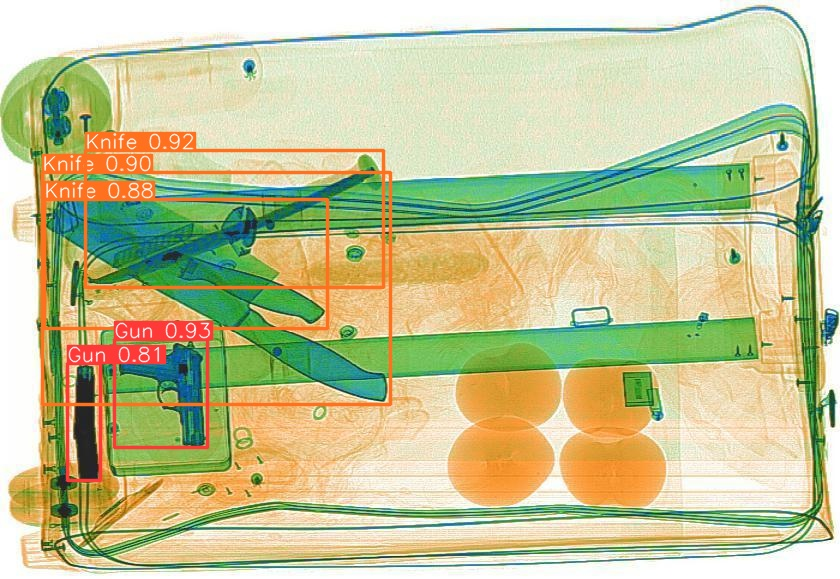

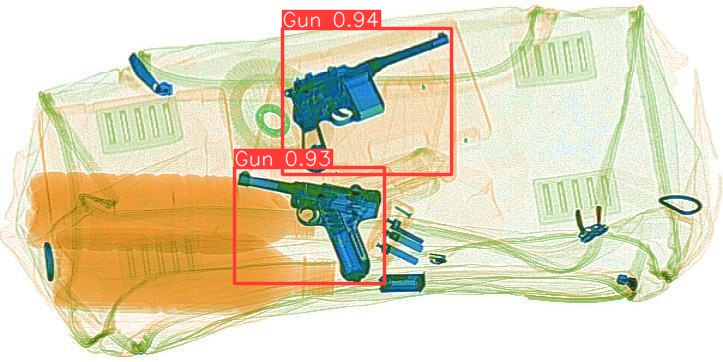

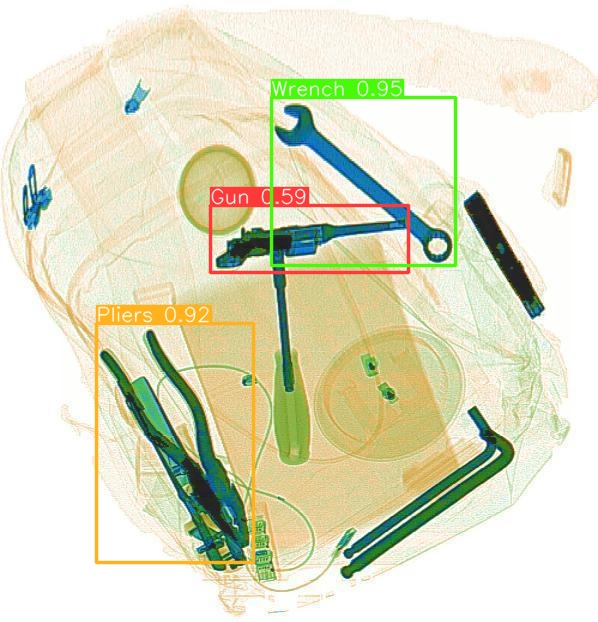

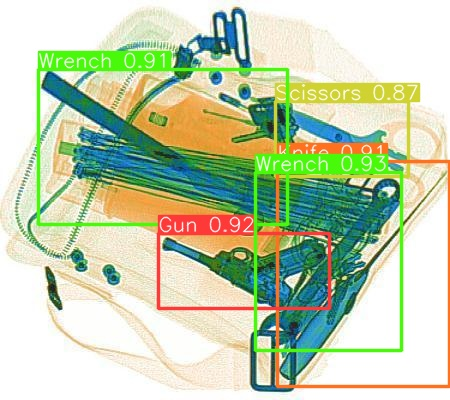

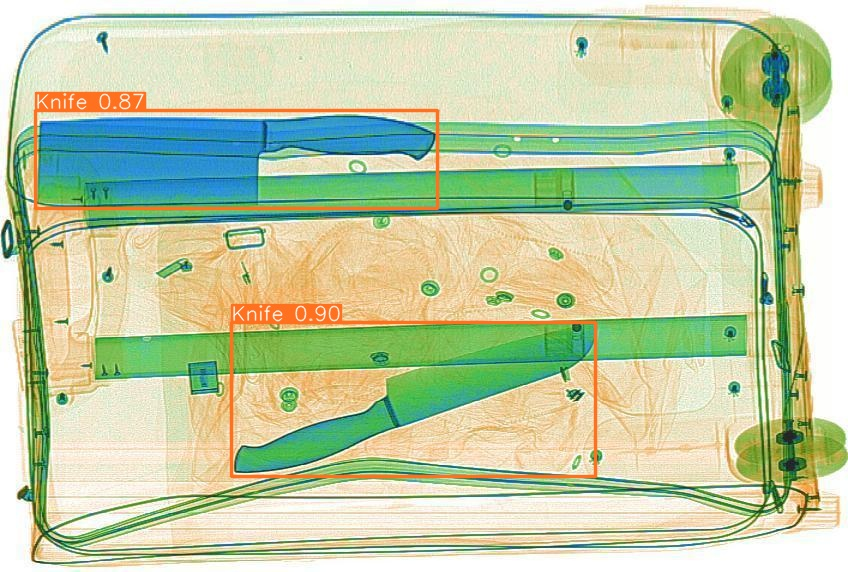

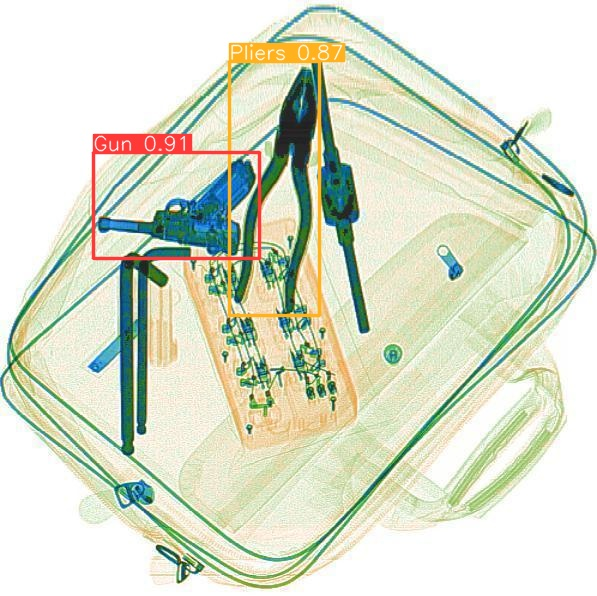

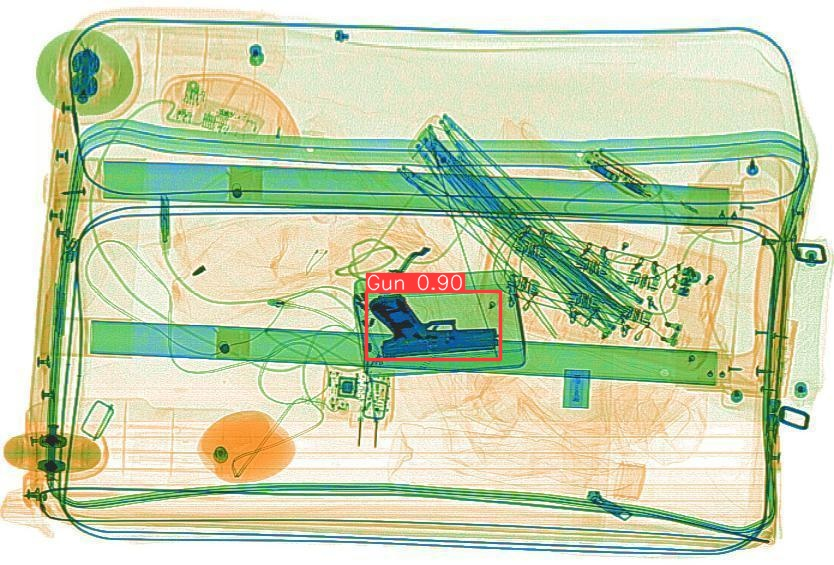

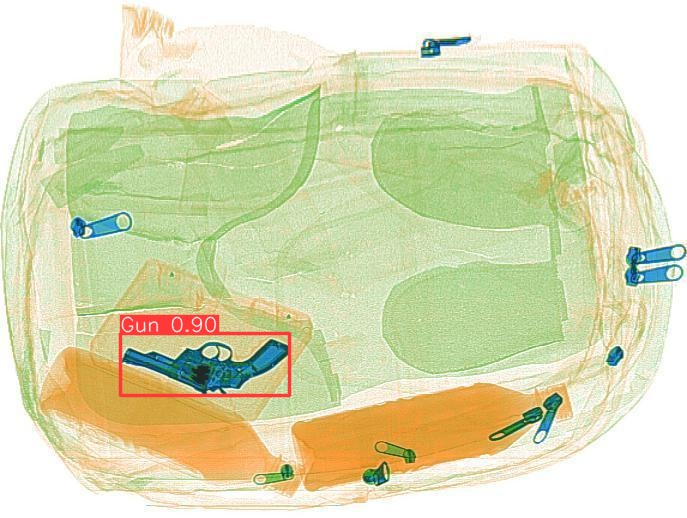

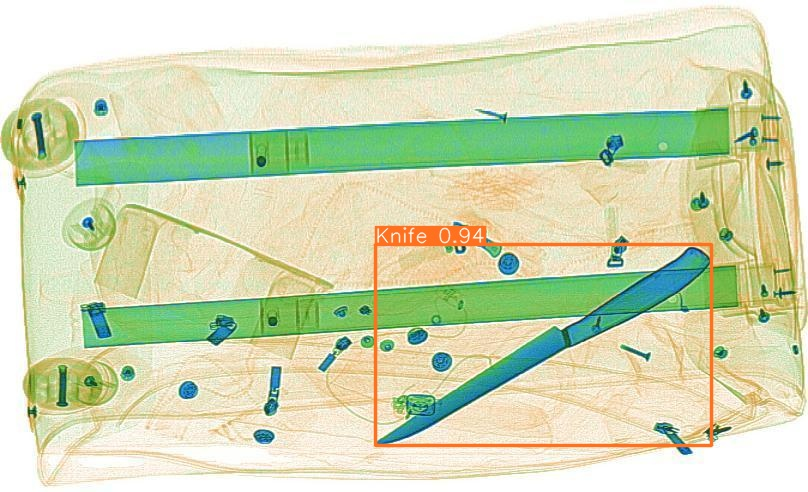

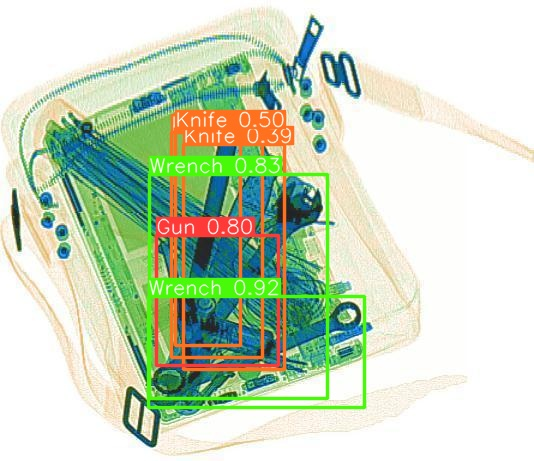

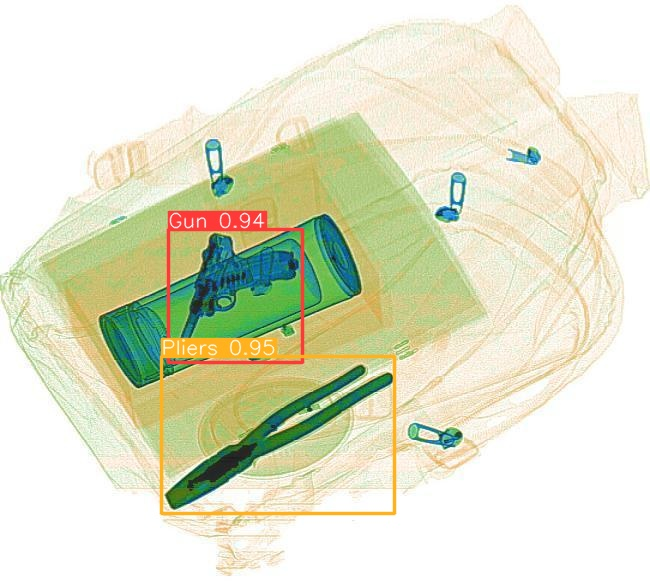

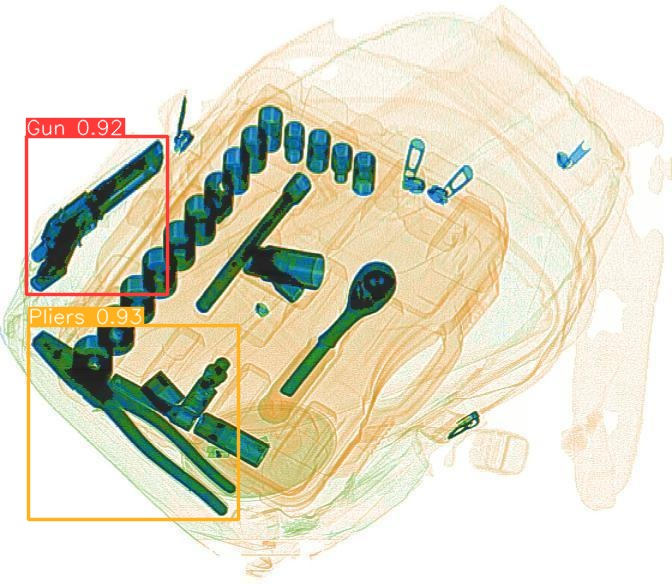

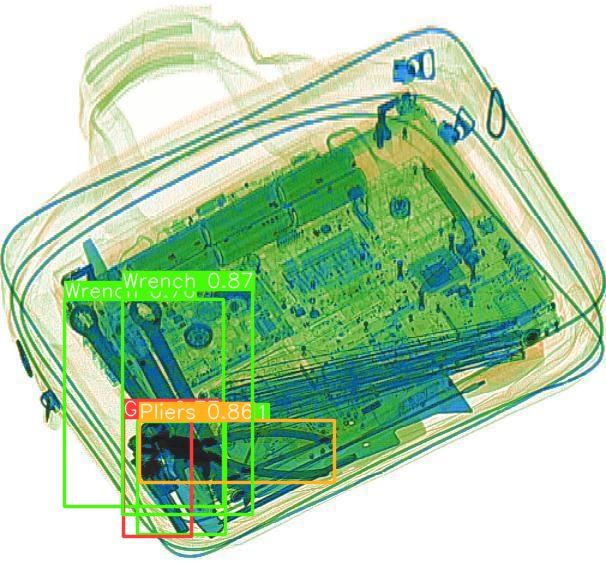

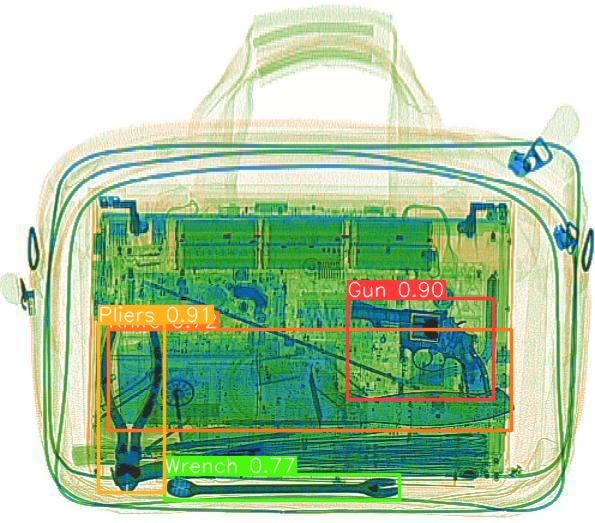

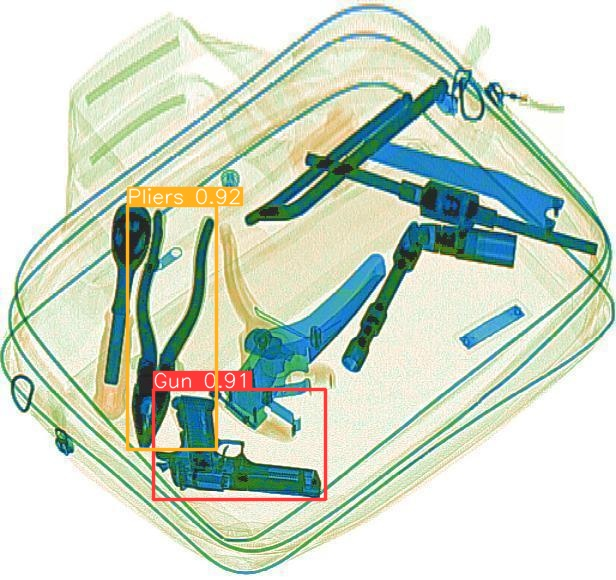

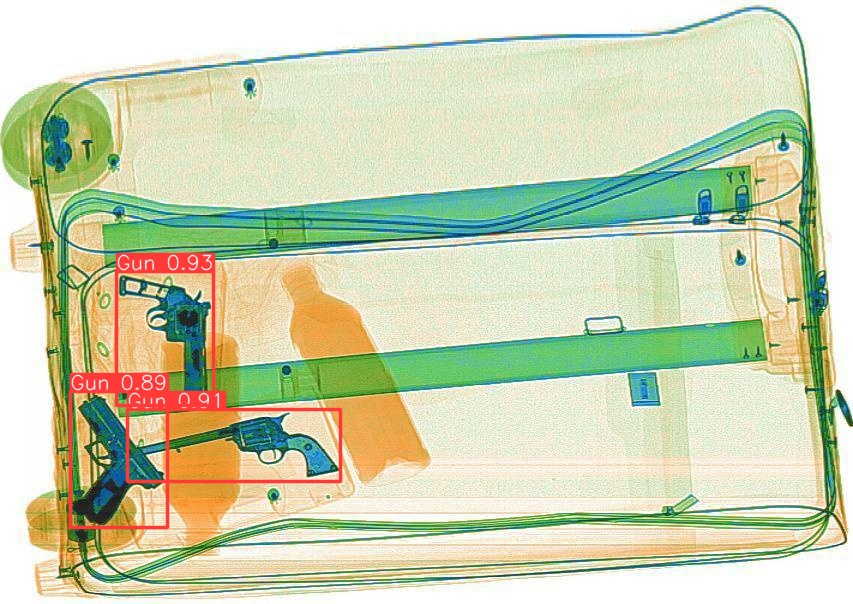

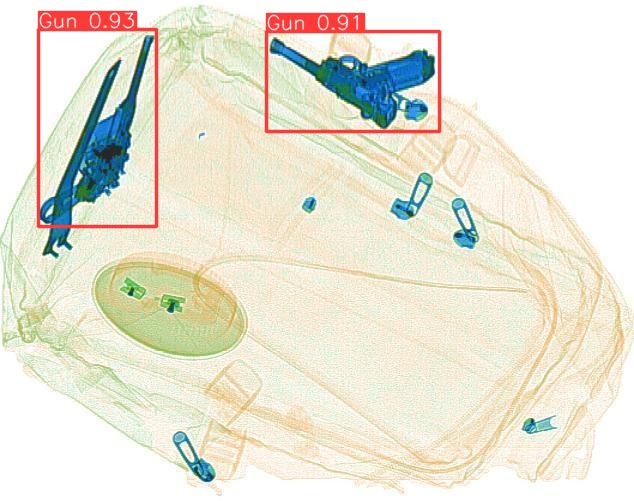

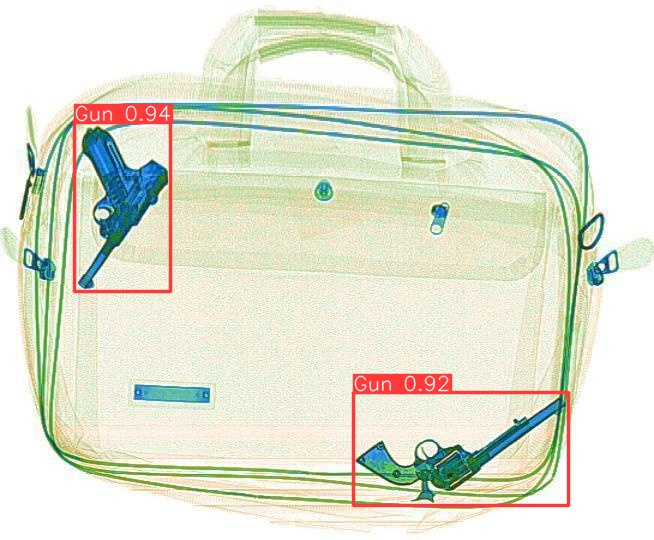

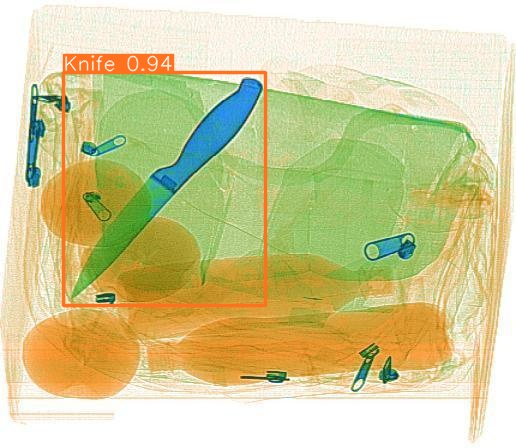

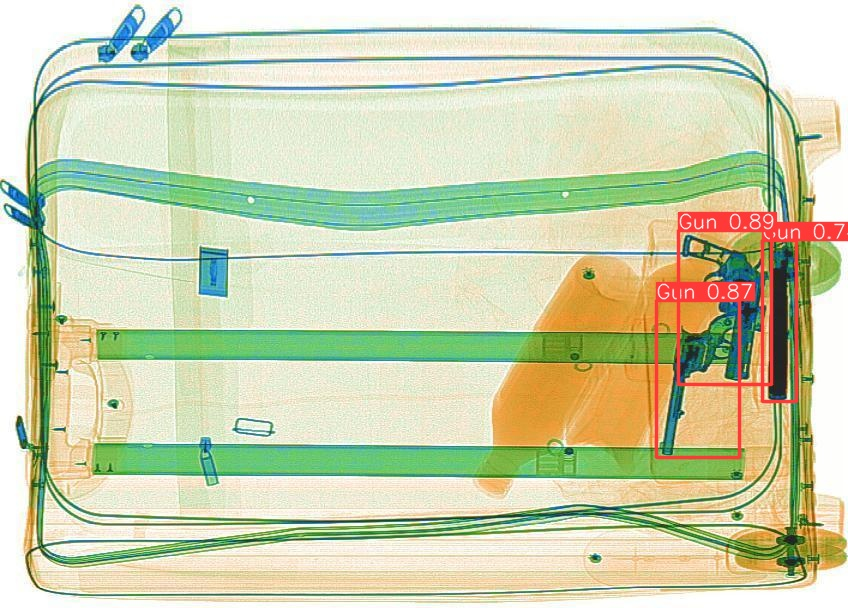

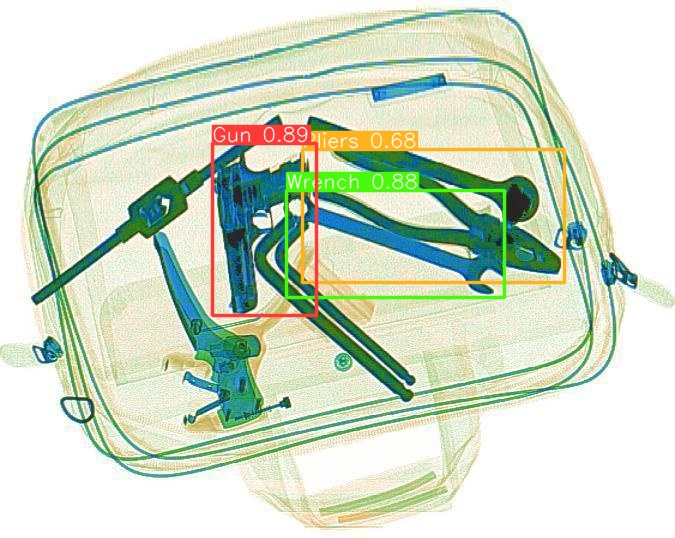

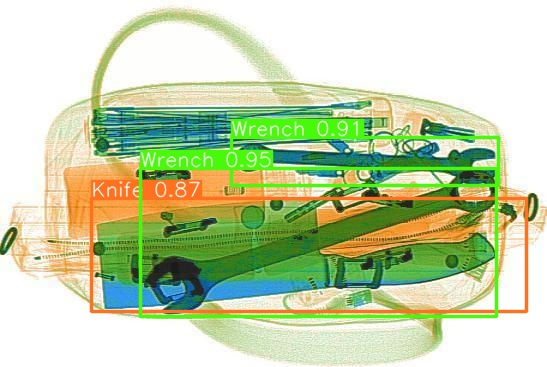

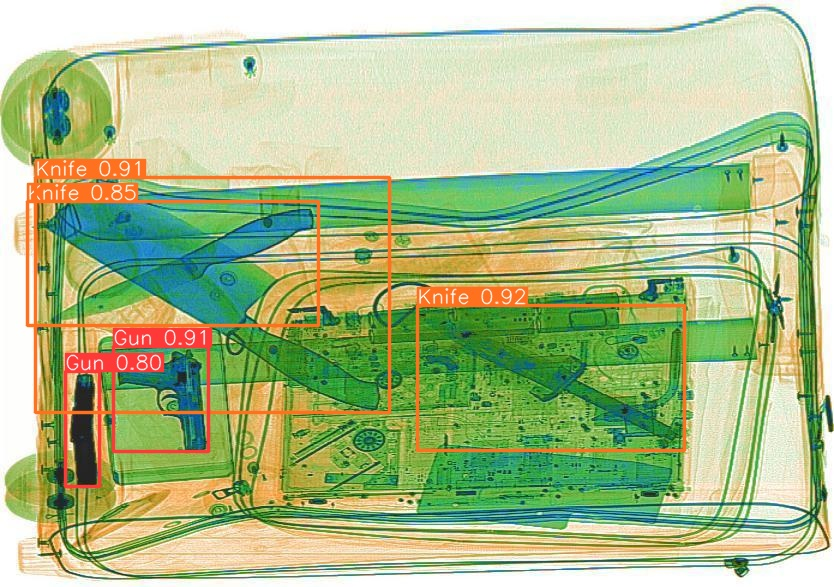

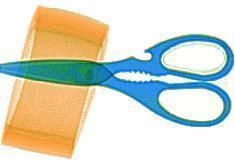

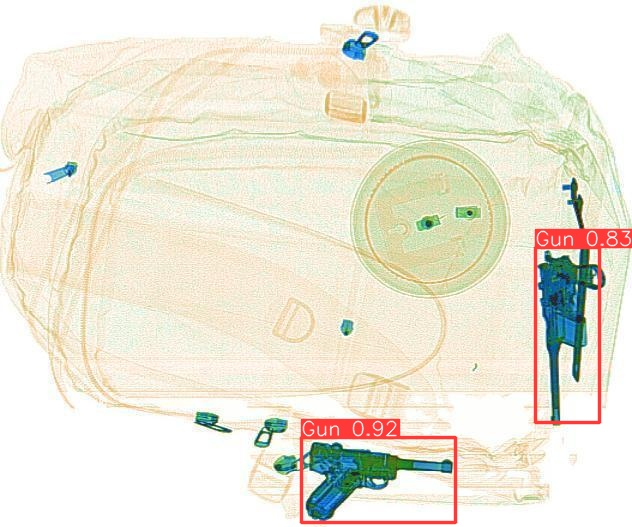

In [11]:
yolo8_model_detection=YOLO('YOLO_weights/SIXray_Output/weights/best.pt')
yolo8_model_detection.predict(source='/kaggle/working/weapon_detection-7/test/images', save=True )
from IPython.display import Image, display
import os
res_path='runs/detect/predict'
for image in os.listdir(res_path)[-25:]: # Displaying only 10 results
  # print(os.path.join(res_path,image))
  display(Image(filename=os.path.join(res_path,image), height=300,width=500))

# **MODEL BENCHMARK**

In [10]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU with training configurations
benchmark(model= yolo8_model_detection, data='/kaggle/working/datasets/sixray100-1/data.yaml', imgsz=640, half=False, device=0)

Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5314.0/8062.4 GB disk)

Benchmarks complete for best.pt on /kaggle/working/datasets/sixray100-1/data.yaml at imgsz=640 (547.43s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅        6.0               0.7094                   11.63
1             TorchScript       ✅       11.9               0.7157                    5.35
2                    ONNX       ✅       11.7               0.7157                   11.41
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❎       15.2                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ✅       29.2               0.7157                   18.82
7     TensorFlow GraphDef       ✅       11.7               0.7157                   17.78
8         TensorFlow L

Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅        6.0               0.7094                   11.63
1             TorchScript       ✅       11.9               0.7157                    5.35
2                    ONNX       ✅       11.7               0.7157                   11.41
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❎       15.2                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ✅       29.2               0.7157                   18.82
7     TensorFlow GraphDef       ✅       11.7               0.7157                   17.78
8         TensorFlow Lite       ❌        0.0                  NaN                     NaN
9     TensorFlow Edge TPU       ❌        0.0                  NaN                     NaN
10          TensorFlow.js       ❌        0.0                  NaN                     NaN
11           PaddlePaddle       ✅       23.3               0.7157                  263.51
12                   ncnn       ❌        0.0                  NaN                     NaN